In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/KIIT/Downloads/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis(one variabe analysis)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


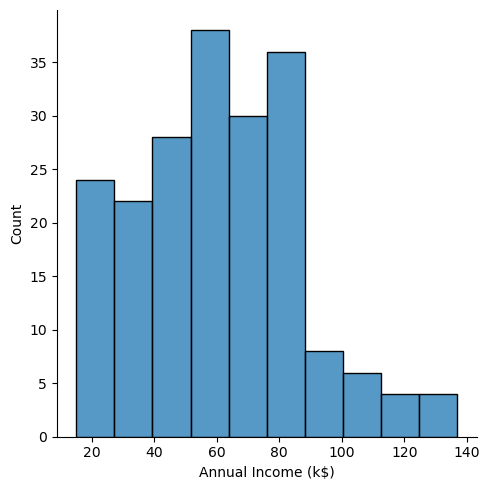

In [7]:
sns.displot(df['Annual Income (k$)']);

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

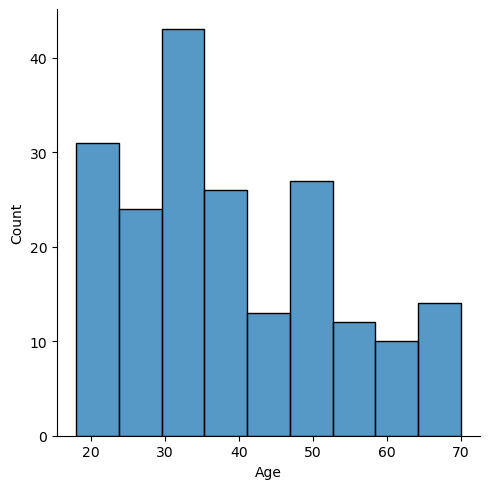

<Figure size 640x480 with 0 Axes>

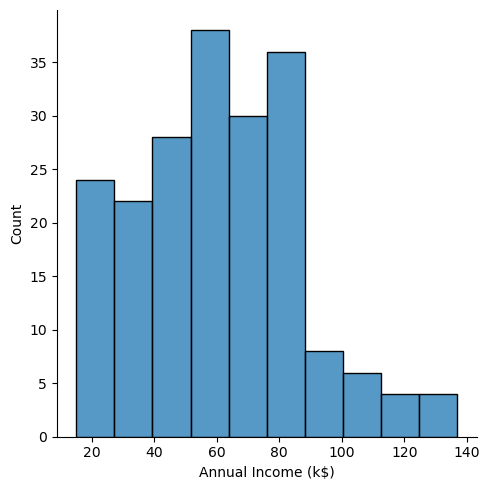

<Figure size 640x480 with 0 Axes>

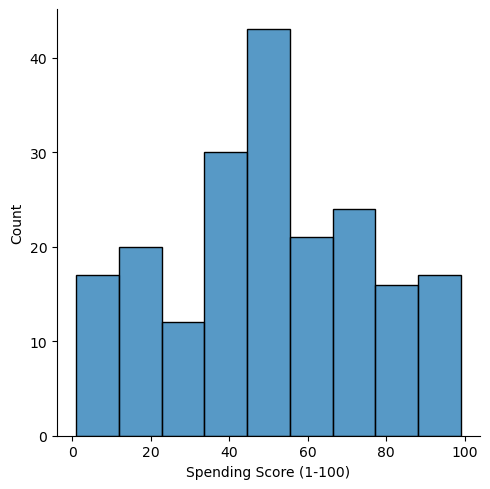

In [10]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for column in columns:
    plt.figure()
    sns.displot(df[column])

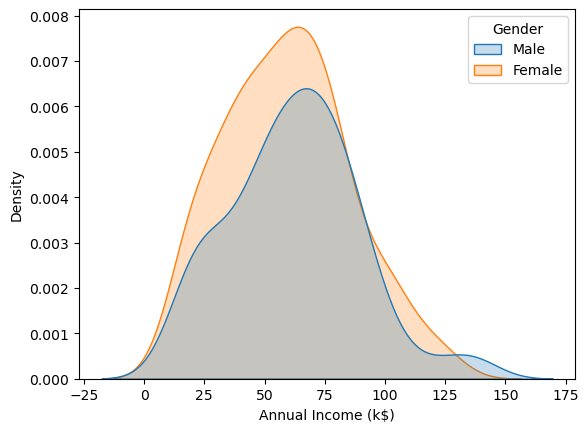

In [18]:
sns.kdeplot(data = df, x = 'Annual Income (k$)', shade = True, hue ='Gender');

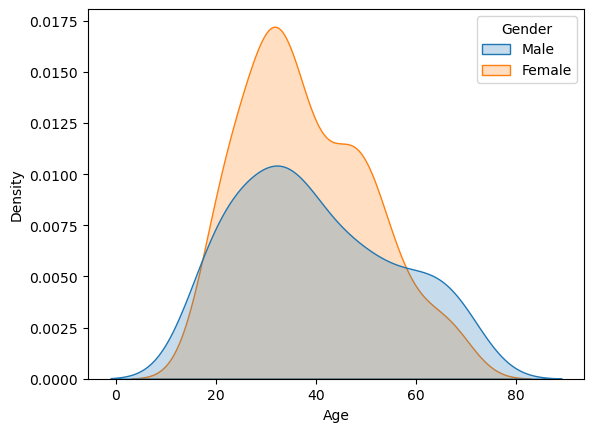

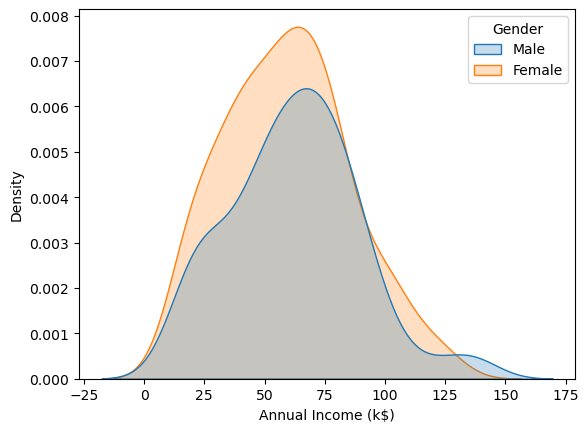

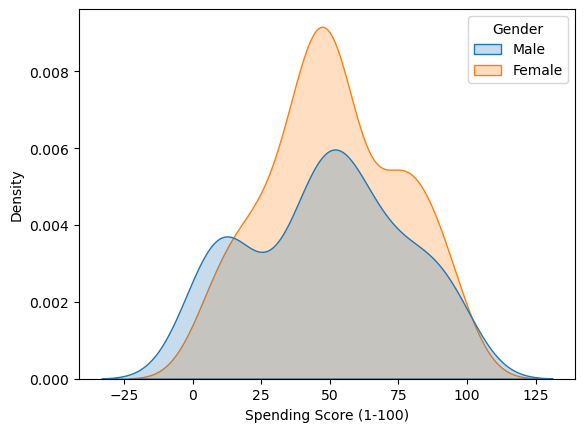

In [19]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for column in columns:
    plt.figure()
    sns.kdeplot(data = df, x = column, shade = True, hue ='Gender');

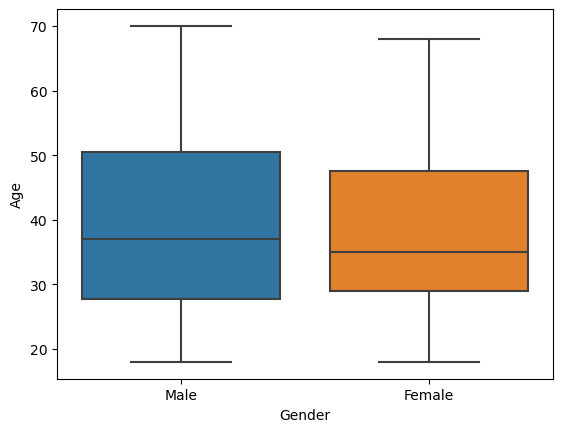

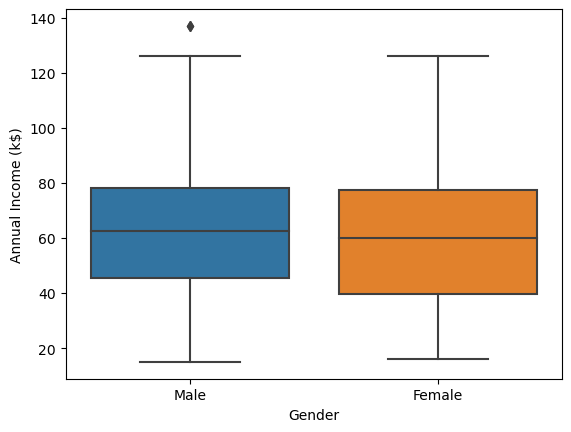

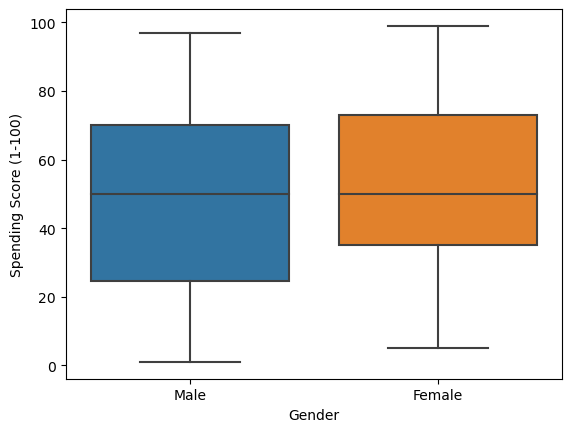

In [22]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for column in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[column])

In [24]:
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

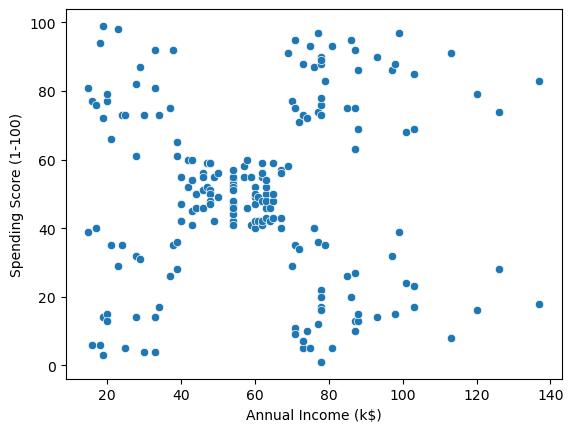

In [25]:
sns.scatterplot(data = df, x ='Annual Income (k$)', y ='Spending Score (1-100)'  )

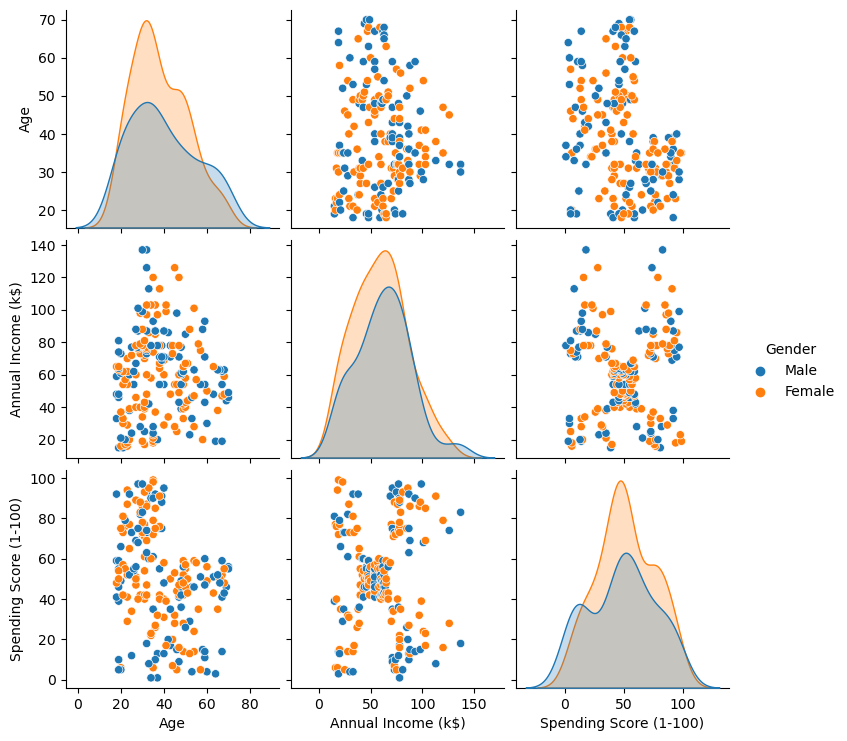

In [28]:
#df = df.drop('CustomerID', axis=1)
sns.pairplot(df, hue = 'Gender')

In [31]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [33]:
#correlation function
# going to exclude non numeric values i.e gender
# df_numeric = df.select_dtypes(include=['float64', 'int64'])
# df_numeric = df.corr()

# going to map the values of male to 0 and female to 1


ValueError: could not convert string to float: 'Male'

# Clustering - Univariate, Bivariate, Multivariate

In [52]:
clustering1 = KMeans(n_clusters=3)

In [53]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [54]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [55]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [56]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [57]:
clustering1.inertia_  # distance between the centroids

23517.330930930937

In [58]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [59]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3949.2756132756135,
 2827.308424908425,
 2357.750396825397,
 1737.161255411255]

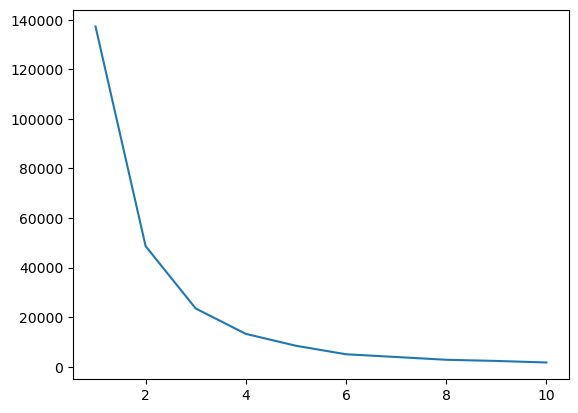

In [60]:
plt.plot(range(1,11), inertia_scores)
# as we can see the elbow is starting from 3 so 3 can be the number of clusters

In [61]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [65]:
#Univariate 
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [73]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Clustering'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clustering
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


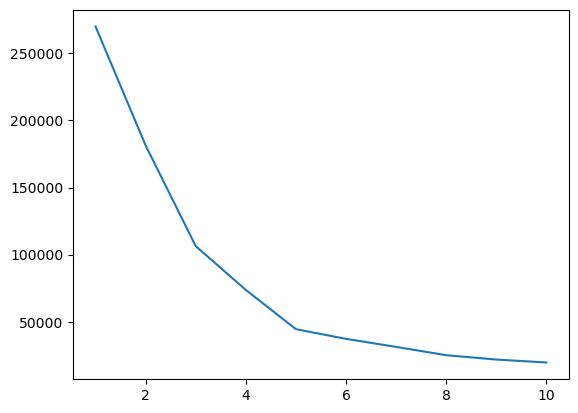

In [74]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [72]:
# we can see the elbow is at 5

In [86]:
#for the centre or centroid
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['Annual Income (k$)','Spending Score (1-100)']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

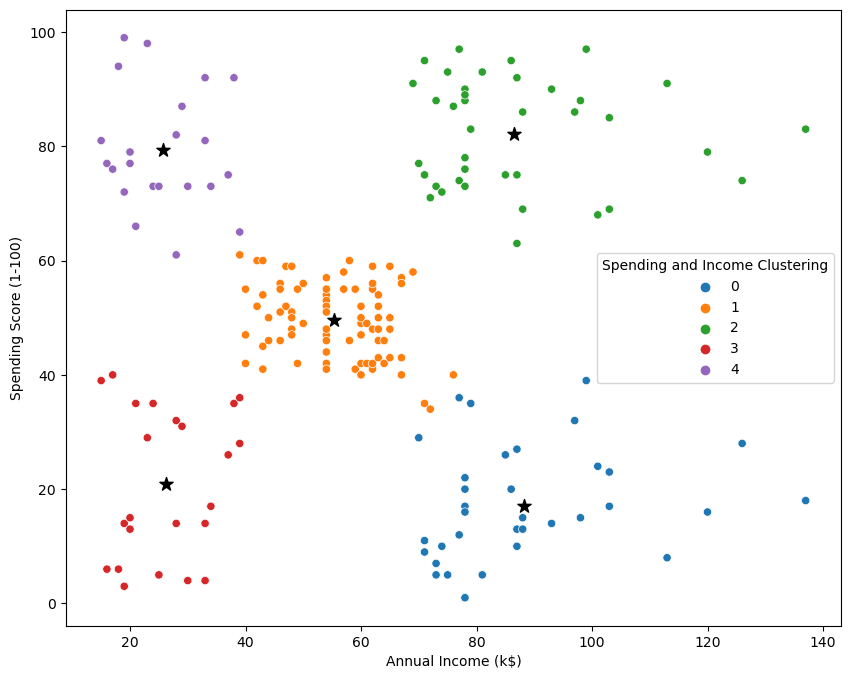

In [87]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers['Annual Income (k$)'], y = centers['Spending Score (1-100)'],s = 100, c = 'black', marker ='*' )
sns.scatterplot(data = df, x ='Annual Income (k$)', y='Spending Score (1-100)', hue ='Spending and Income Clustering', palette = 'tab10')
#for saving a fig
#plt.savefig('whatever name u want to save')

In [90]:
pd.crosstab(df['Spending and Income Clustering'],df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Clustering,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [91]:
#avg age
df.groupby('Spending and Income Clustering')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Clustering,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [ ]:
#Multivariate Cluster
from sklearn.preprocessing import StandardScaler


In [ ]:
scale = StanadardScaler()

In [92]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clustering
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


In [96]:
dff = pd.get_dummies(df, drop_first=True)
dff = dff.astype(int) # without this the values are converted into true or false
dff.head()
#True = 1, False = 0

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clustering,Gender_Male
0,19,15,39,0,3,1
1,21,15,81,0,4,1
2,20,16,6,0,3,0
3,23,16,77,0,4,0
4,31,17,40,0,3,0


In [97]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Clustering', 'Gender_Male'],
      dtype='object')

In [99]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dff = scaler.fit_transform(dff)

In [104]:
dff = pd.DataFrame(scaler.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


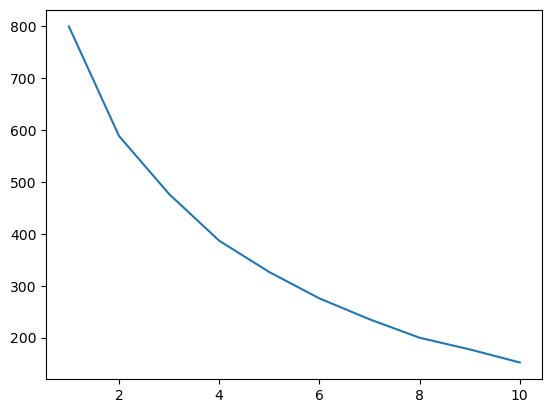

In [105]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [107]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Clustering
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,2
196,Female,45,126,28,1,0
197,Male,32,126,74,1,2
198,Male,32,137,18,1,0


In [ ]:
# if u want to convert it to csv
#df.to_csv()